<a href="https://colab.research.google.com/github/Nishara-Sewminie/TeaCarePlus/blob/main/Model%20testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 295ms/step


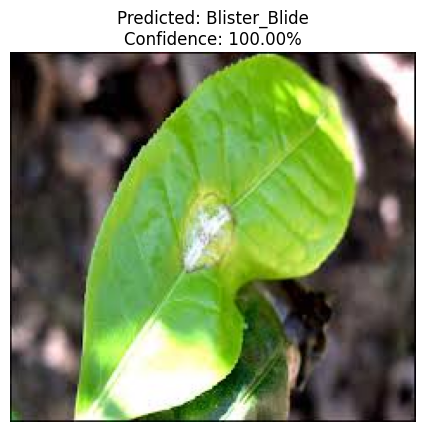

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/plant_disease_colabmodel2.keras')  # Replace with the path to your trained model

# Define a function for prediction
def predict_disease(image_path):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Convert to batch format

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = 100 * np.max(predictions[0])

    return predicted_class, confidence

# Define a function to display the prediction
def display_prediction(image_path):
    class_names = ['Bird_Eye_Spot', 'Blister_Blide', 'healthy']

    predicted_class, confidence = predict_disease(image_path)
    predicted_label = class_names[predicted_class]

    img = plt.imread(image_path)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}\nConfidence: {confidence:.2f}%")
    plt.axis('off')
    plt.show()

# Provide the path to the image you want to predict
image_path = '/content/drive/MyDrive/MAIN PROJECT/2/images (2).jpg'  # Change this to your image file path
display_prediction(image_path)
